In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols

import itertools

from functions import *

import warnings
warnings.filterwarnings("ignore")

In [36]:
df = pd.read_csv('../Bolt_interview/Test.csv - test.csv')

In [37]:
print(df.calc_created.min())
print(df.calc_created.max())


2020-02-02 0:01:16
2020-03-13 9:44:45


In [38]:
df.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,ticket_id_new,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,1,upfront,13384.0,1091.0,NaN,1376,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,1,upfront,2286.0,360.0,NaN,2035,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,1,upfront,4101.0,433.0,NaN,2222,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,2,upfront_destination_changed,3017.0,600.0,client_destination_changed,1788,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,1,upfront,14236.0,2778.0,NaN,2710,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


In [39]:
df.shape

(4943, 26)

## Creating new features using predicted duration and predicted distance along with calculating percentage differnece between real and predicted values

In [6]:
# creating new days features from cal_created
df = process_date_time(df, 'calc_created')

df = createNewFeatures(df, 'predicted_distance', 'predicted_duration')


df = calculateDifferencesAndPercentage(df, 
                                      ('metered_price', 'upfront_price'),
                                      ('distance', 'predicted_distance'),
                                      ('duration', 'predicted_duration'))







## Checking null values in whole dataframe

In [7]:
nullValuePercentageCheck(df)

order_id_new                             0.000000
order_try_id_new                         0.000000
calc_created                             0.000000
metered_price                            0.404613
upfront_price                           31.033785
distance                                 0.000000
duration                                 0.000000
gps_confidence                           0.000000
entered_by                               0.000000
b_state                                  0.000000
dest_change_number                       0.000000
prediction_price_type                    0.404613
predicted_distance                       0.404613
predicted_duration                       0.404613
change_reason_pricing                   93.971273
ticket_id_new                            0.000000
device_token                           100.000000
rider_app_version                        0.323690
order_state                              0.000000
order_try_state                          0.000000


## Checking data types 

In [8]:
dataTypeCheck(df)

order_id_new                                    int64
order_try_id_new                                int64
calc_created                           datetime64[ns]
metered_price                                 float64
upfront_price                                 float64
distance                                        int64
duration                                        int64
gps_confidence                                  int64
entered_by                                     object
b_state                                        object
dest_change_number                              int64
prediction_price_type                          object
predicted_distance                            float64
predicted_duration                            float64
change_reason_pricing                          object
ticket_id_new                                   int64
device_token                                  float64
rider_app_version                              object
order_state                 

## Breaking whole dataframe into significance, non-significance and null values

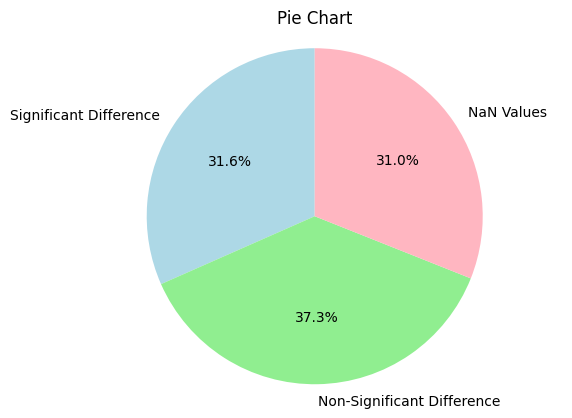

In [9]:
df_significant_price_difference, df_non_significant_price_difference, df_nan= segregatingDataBasedOnPriceDifference(df, 'metered_price_difference_percentage')

generate_pie_chart(df, df_significant_price_difference, df_non_significant_price_difference, df_nan)



##  calculating count of positive and negative metered_price_differnce between null, significance and non-significance values

In [10]:
print('Count for whole data set')
count_positive_negative(df, 'metered_price_difference')
print('\n')

print('Count for significant price differnece dataset')
count_positive_negative(df_significant_price_difference, 'metered_price_difference')
print('\n')

print('Count for non significant price difference')
count_positive_negative(df_non_significant_price_difference, 'metered_price_difference')

Count for whole data set
Positive Count: 1991
Negative Count: 1243


Count for significant price differnece dataset
Positive Count: 1202
Negative Count: 361


Count for non significant price difference
Positive Count: 789
Negative Count: 882


## combining significance and non-significance df and normalizing the numerical values

In [11]:
df_nan_removed = pd.concat([df_non_significant_price_difference, df_significant_price_difference])


cols = ['distance', 'distance_difference','predicted_distance',
        'duration','duration_difference','predicted_duration',
        'metered_price','upfront_price', 'metered_price_difference',
       'distance_time','time_distance','distance_squared','time_squared']


df_significant_price_difference = columnNormalization(df_significant_price_difference, cols)
df_non_significant_price_difference = columnNormalization(df_non_significant_price_difference, cols)
df_nan_removed = columnNormalization(df_nan_removed, cols)




## checking the outliers and separating the outliers from the dataset

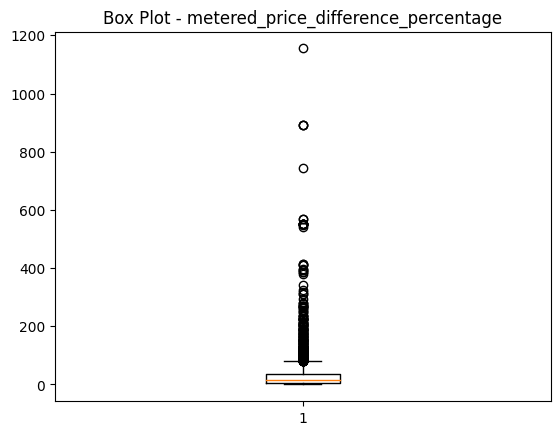

(3161, 41)
(248, 41)


In [12]:
df_filtered, df_outliers = removeOutliers(df_nan_removed, 'metered_price_difference_percentage')
print(df_filtered.shape)
print(df_outliers.shape)


## Analyzing effect of day and weekend on our datset

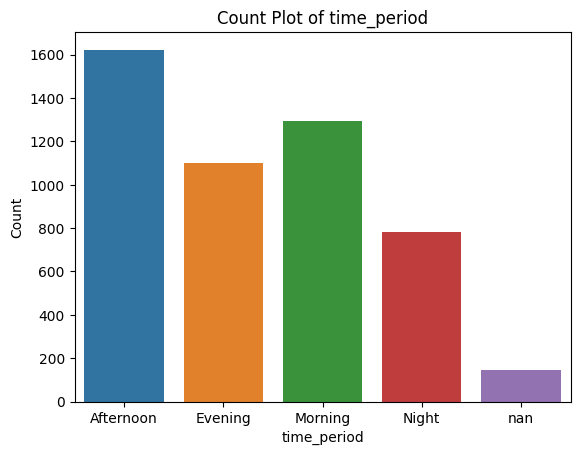

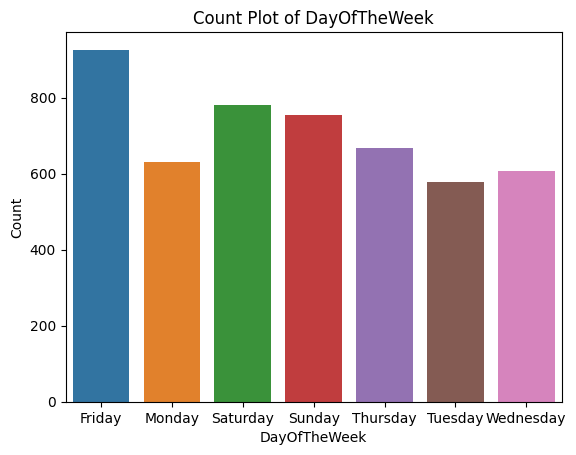

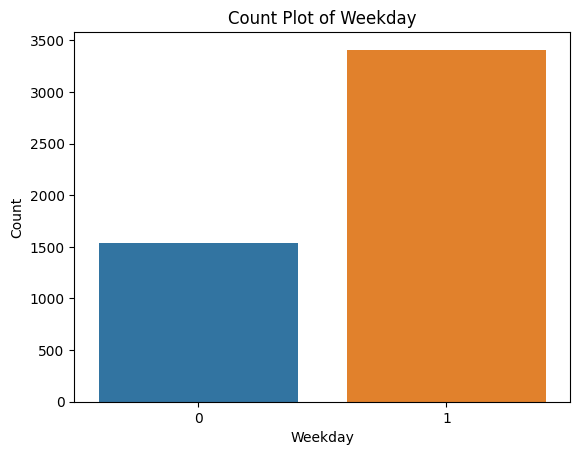

In [13]:
## Analyzing time period, days and weekedays

# Example usage
x_values = ['time_period', 'DayOfTheWeek' ,'Weekday']  # Replace with your desired X values
y = 'order_id_new'  # Replace with your Y value
plotSum(df, x_values, y)






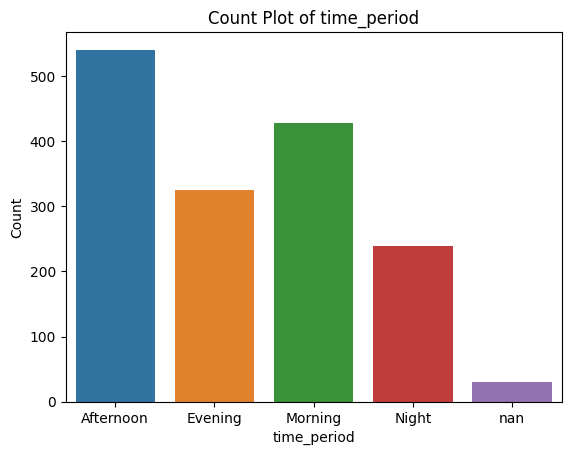

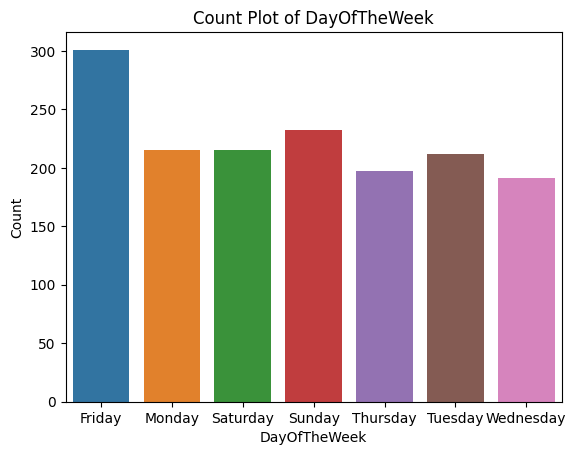

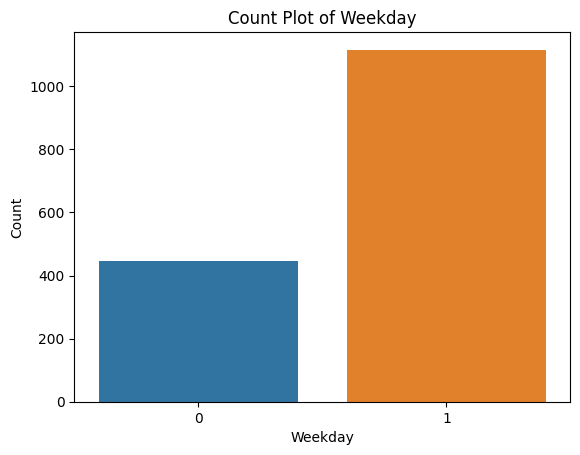

In [14]:
x_values = ['time_period', 'DayOfTheWeek' ,'Weekday']  # Replace with your desired X values
y = 'order_id_new'  # Replace with your Y value
plotSum(df_significant_price_difference, x_values, y)


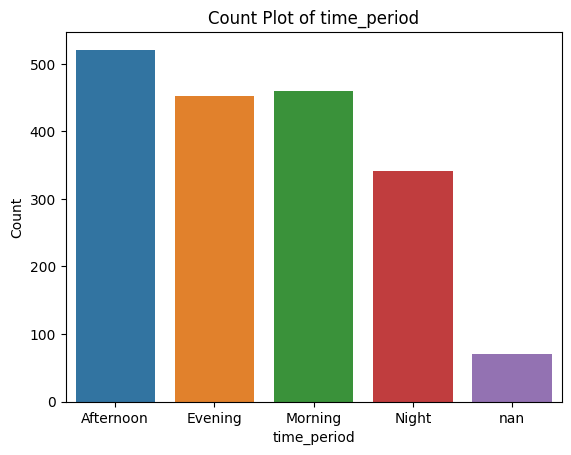

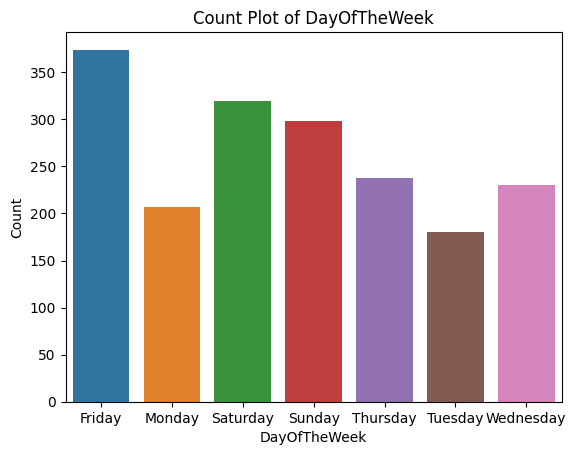

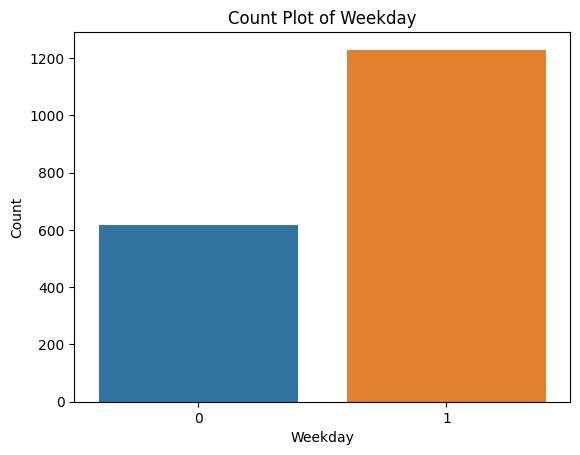

In [15]:


x_values = ['time_period', 'DayOfTheWeek' ,'Weekday']  # Replace with your desired X values
y = 'order_id_new'  # Replace with your Y value

plotSum(df_non_significant_price_difference, x_values, y)



## Analyzing different rider app version 

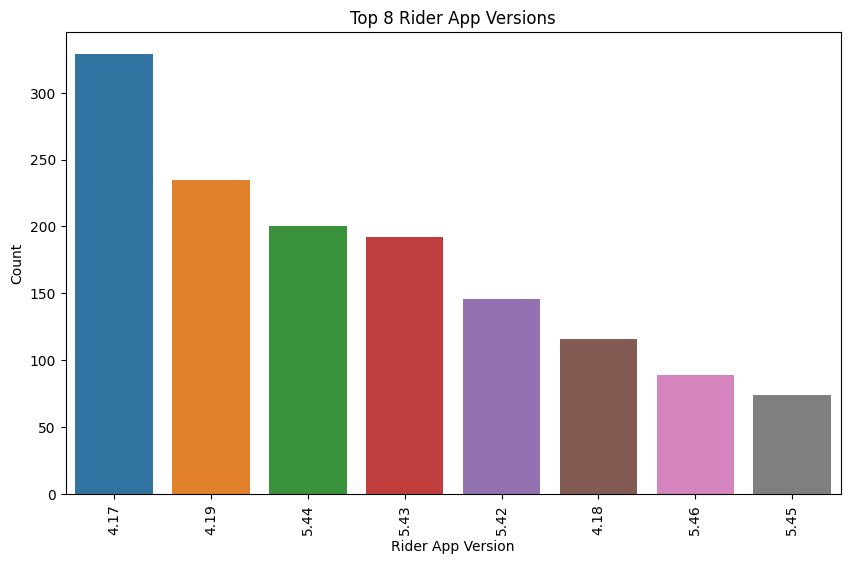

,rider_app_version_sorted,metered_price_difference_percentage
0,4.17,329
1,4.19,235
2,5.44,200
3,5.43,192
4,5.42,146


In [16]:
topAppVersionPlot(df_non_significant_price_difference, 'rider_app_version', 'CA', 'CI', 'metered_price_difference_percentage')


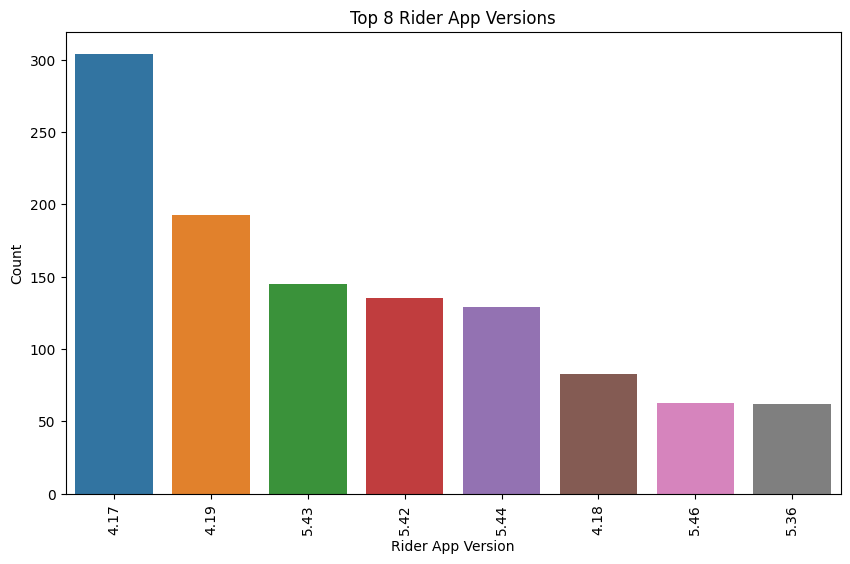

,rider_app_version_sorted,metered_price_difference_percentage
0,4.17,304
1,4.19,193
2,5.43,145
3,5.42,135
4,5.44,129


In [17]:
topAppVersionPlot(df_significant_price_difference, 'rider_app_version', 'CA', 'CI', 'metered_price_difference_percentage')

## Analyzing which company phones have gps_confidence = 0 

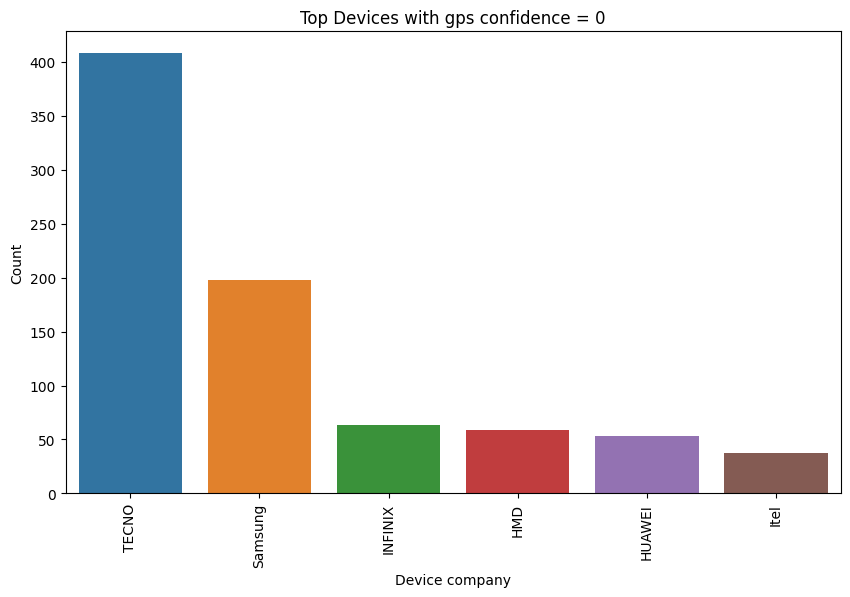

,company_name,count
0,TECNO,408
1,Samsung,198
2,INFINIX,63
3,HMD,59
4,HUAWEI,53
5,Itel,37


In [18]:
topDevicesUsed(df, 'device_name')

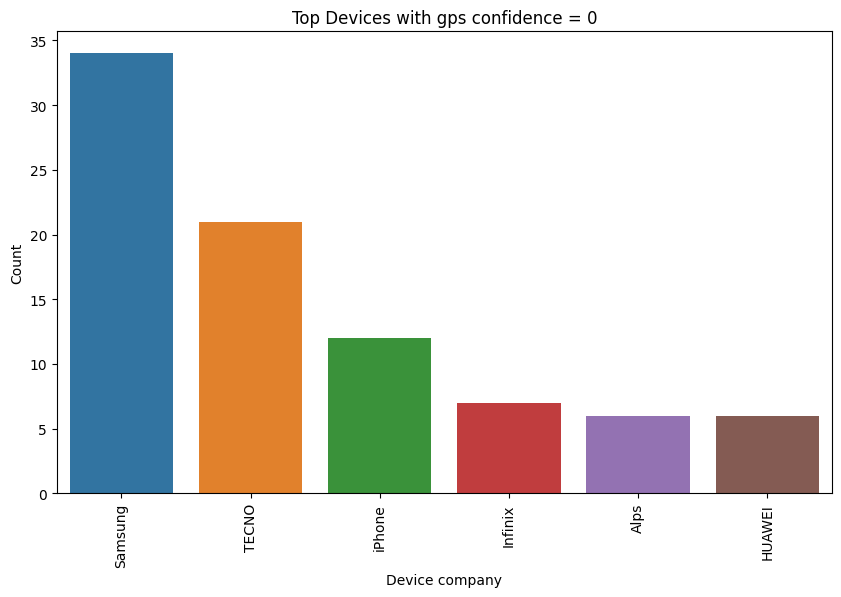

,company_name,count
0,Samsung,34
1,TECNO,21
2,iPhone,12
3,Infinix,7
4,Alps,6
5,HUAWEI,6


In [19]:
topDevicesUsed(df_non_significant_price_difference, 'device_name')


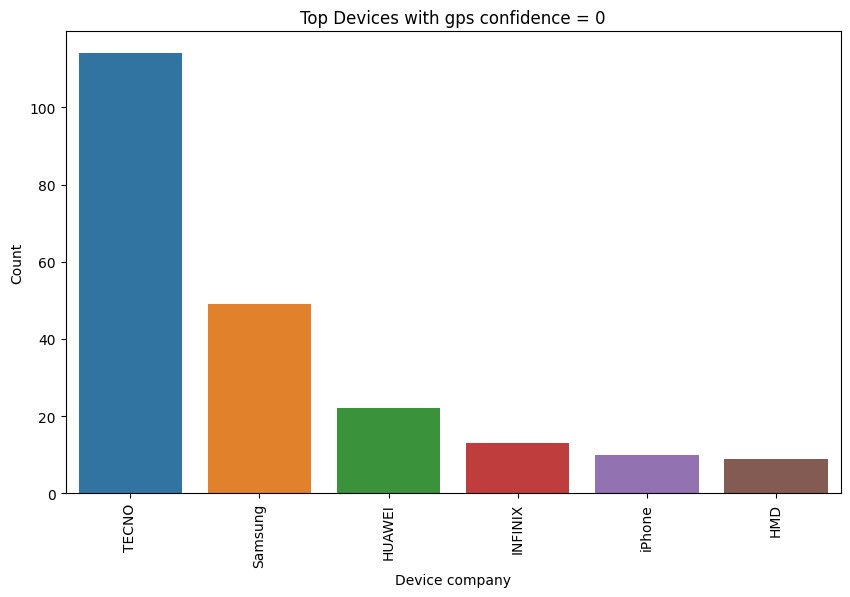

,company_name,count
0,TECNO,114
1,Samsung,49
2,HUAWEI,22
3,INFINIX,13
4,iPhone,10
5,HMD,9


In [20]:
topDevicesUsed(df_significant_price_difference, 'device_name')

## Analyzing distribution of real, predicted and difference values (duration and distance)
## for complete dataset after removing NAN

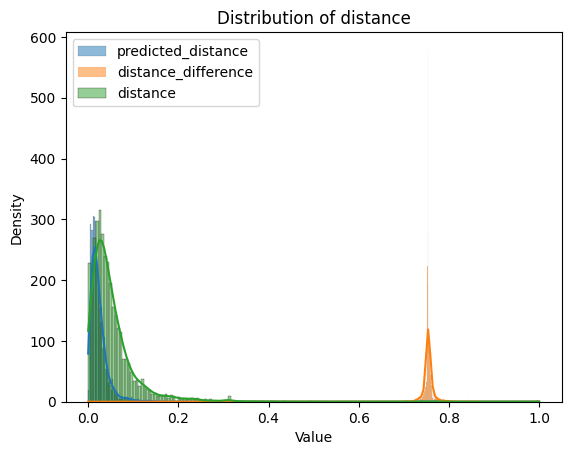

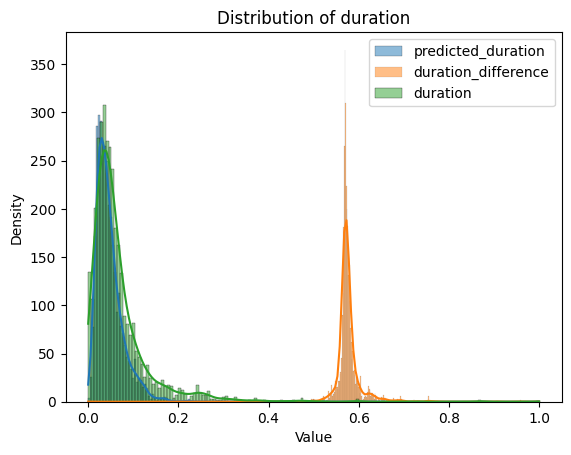

In [21]:
value_sets = [
    ('distance', 'predicted_distance', 'distance_difference', 'distance'),
    ('duration', 'predicted_duration', 'duration_difference', 'duration')
]

plotDensities(df_nan_removed, value_sets)


## Analyzing distribution of multiple categorical features 
## for complete dataset after removing NAN

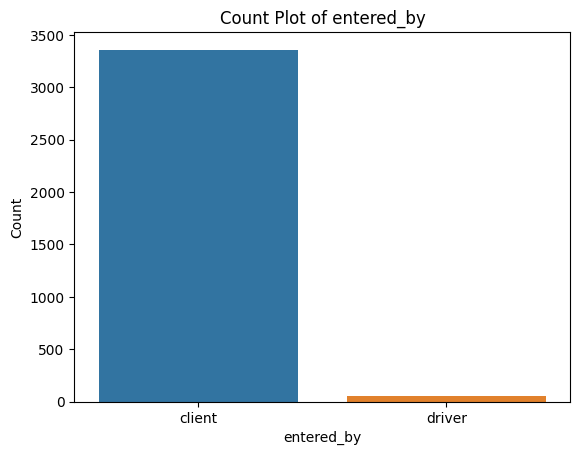

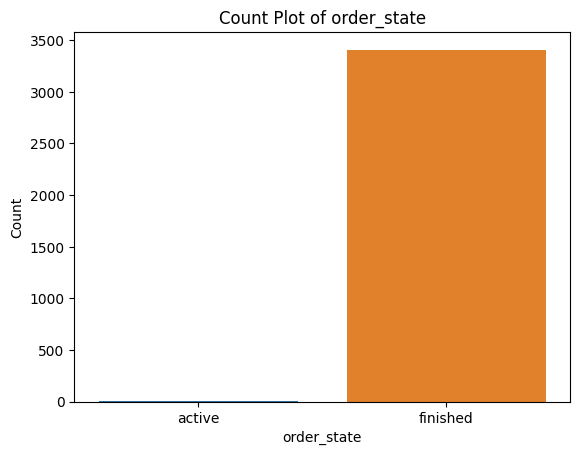

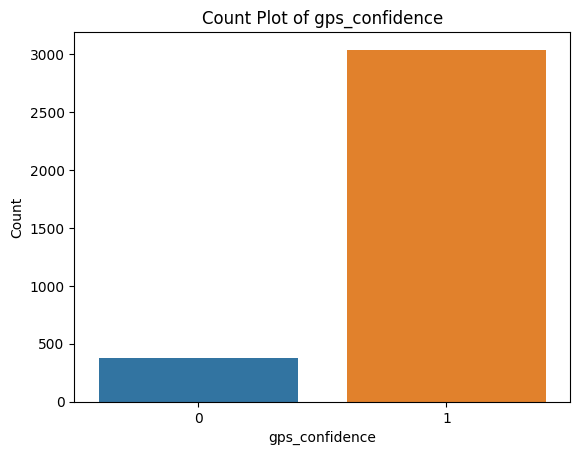

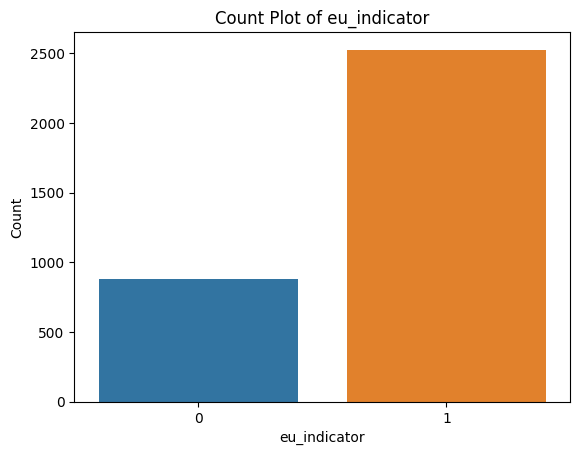

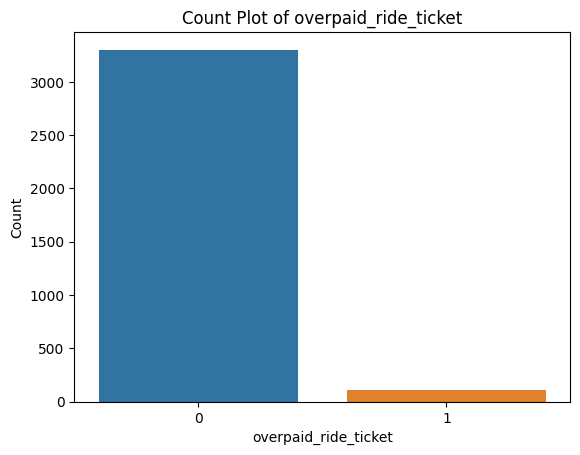

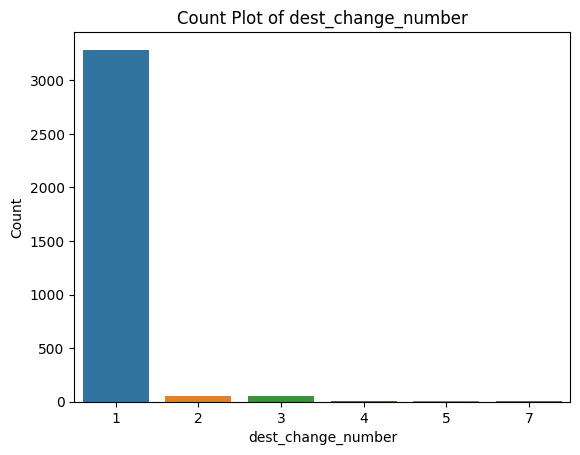

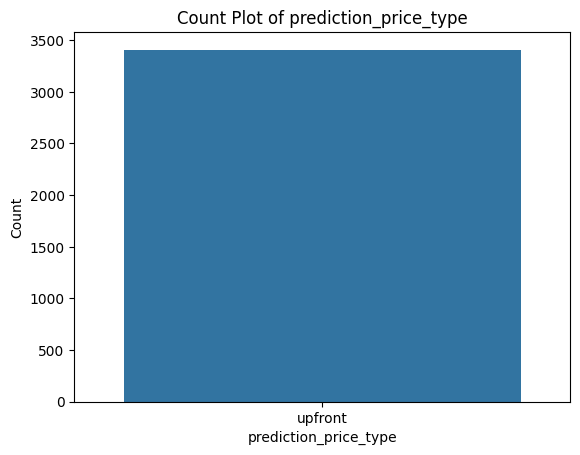

In [22]:
# Example usage
x_values = ['entered_by', 'order_state', 'gps_confidence','eu_indicator',
           'overpaid_ride_ticket','dest_change_number','prediction_price_type']  # Replace with your desired X values
y = 'order_id_new'  # Replace with your Y value

plotSum(df_nan_removed, x_values, y)



## Analyzing effect of different numerical variables on upfront price 
## for complete dataset after removing NAN

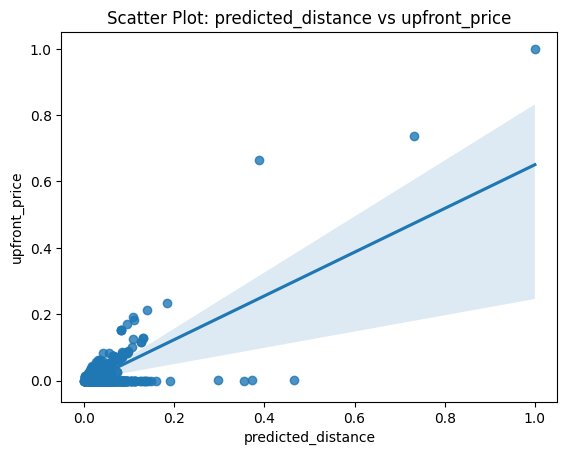

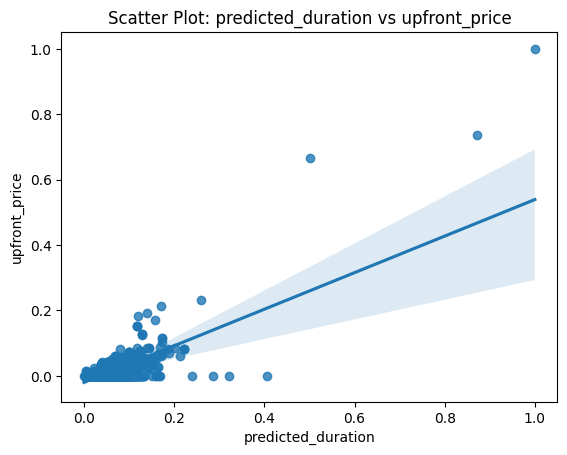

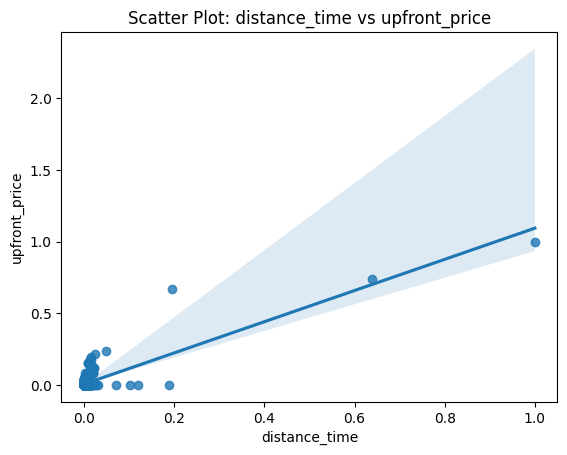

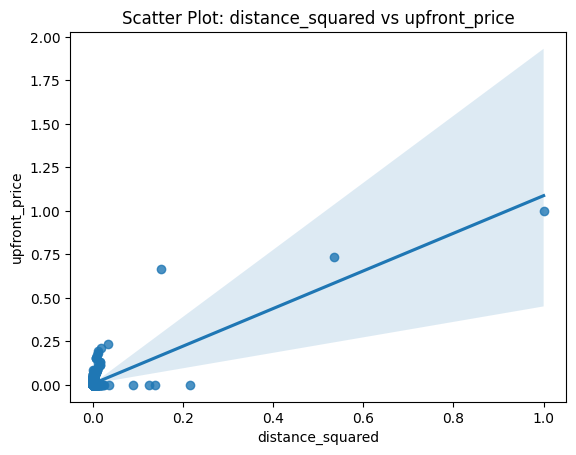

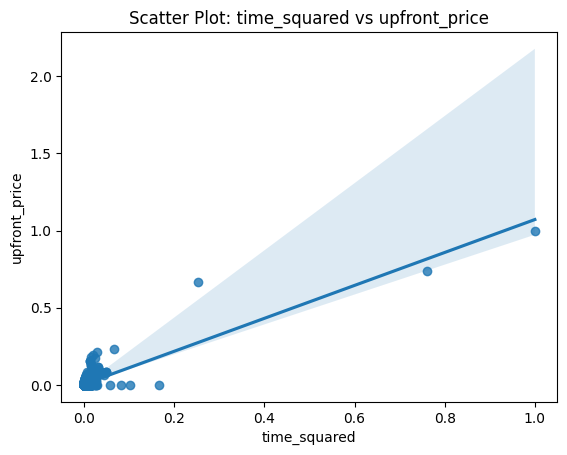

In [23]:
y = 'upfront_price'
X = ['predicted_distance', 'predicted_duration',
     'distance_time',
     'distance_squared','time_squared']

plot_relationships(df_nan_removed, y, X)


## Analyzing distribution of real, predicted and difference values (duration and distance)
## for significance data (% of price difference is > 20%)

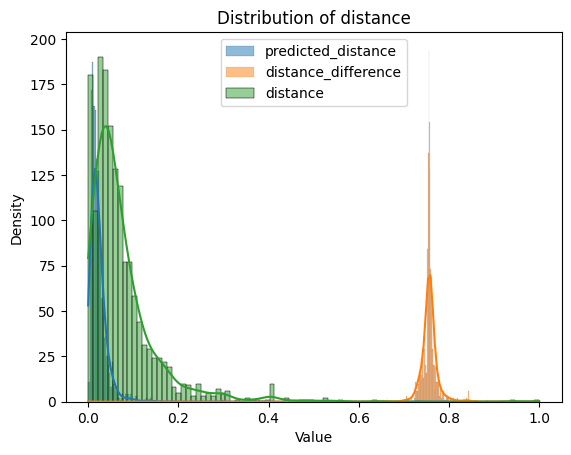

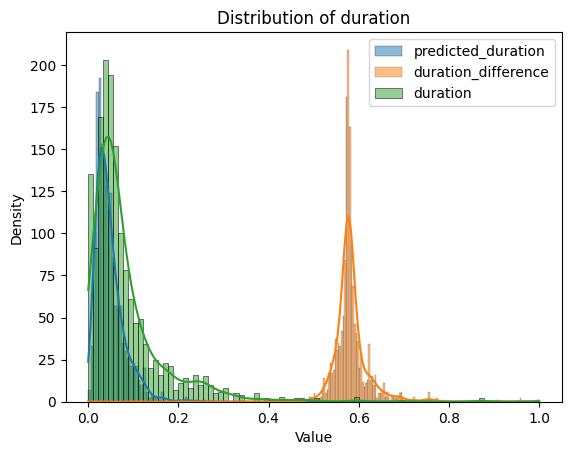

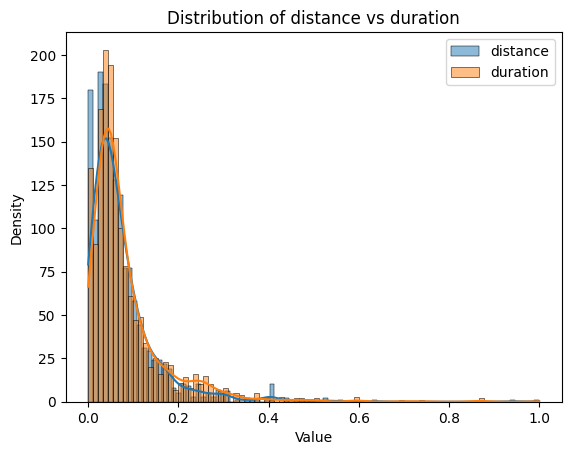

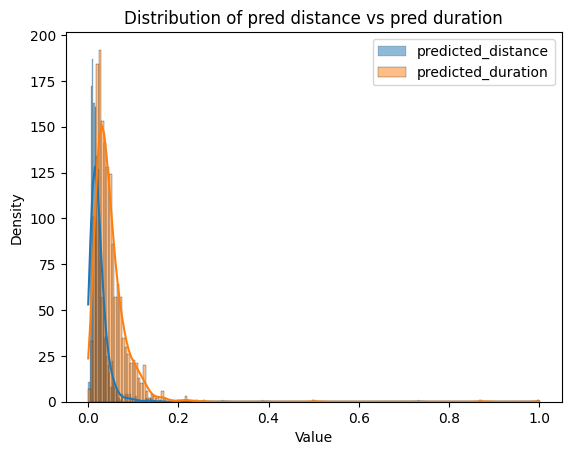

In [24]:
value_sets = [
    ('distance', 'predicted_distance', 'distance_difference', 'distance'),
    ('duration', 'predicted_duration', 'duration_difference', 'duration'),
    ('distance vs duration', 'distance', 'duration'),
    ('pred distance vs pred duration','predicted_distance','predicted_duration')
]

plotDensities(df_significant_price_difference, value_sets)


## Analyzing distribution of multiple categorical features
## for  significance data (% of price difference is > 20%)¶

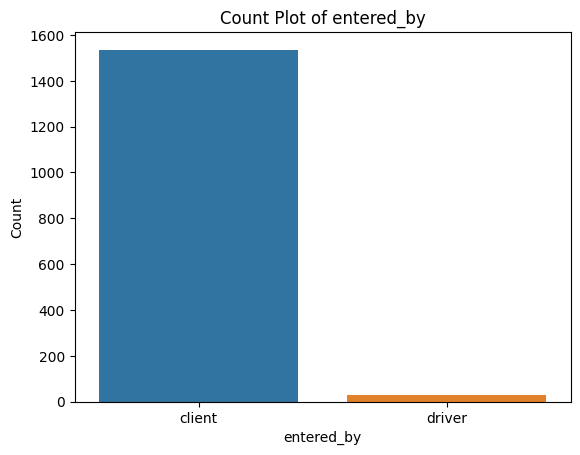

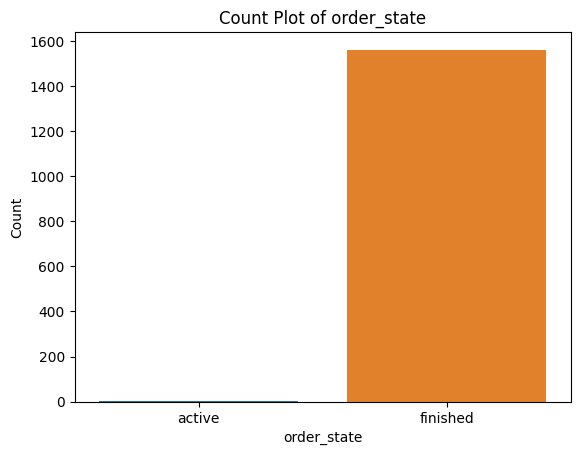

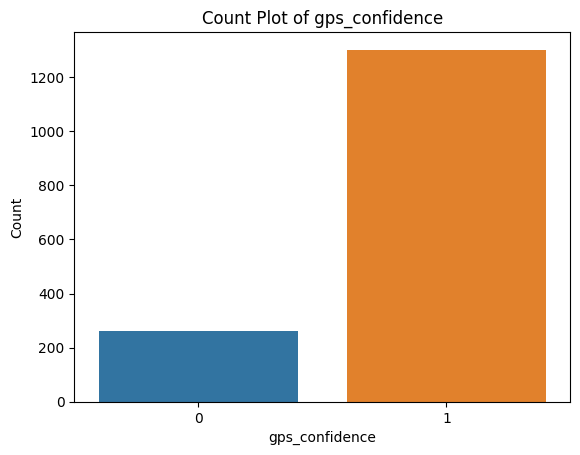

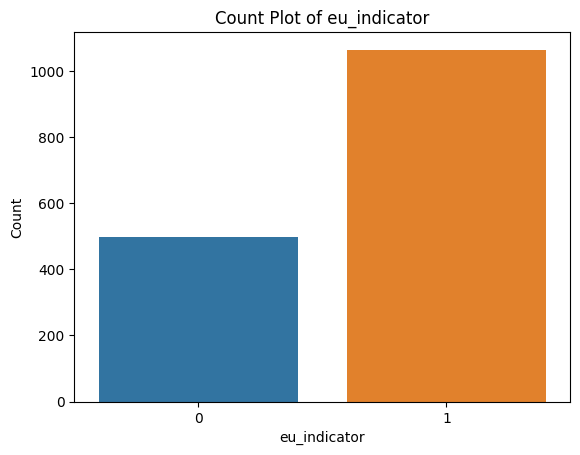

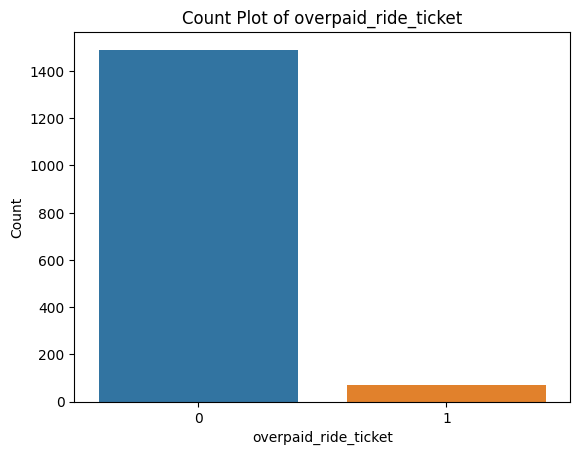

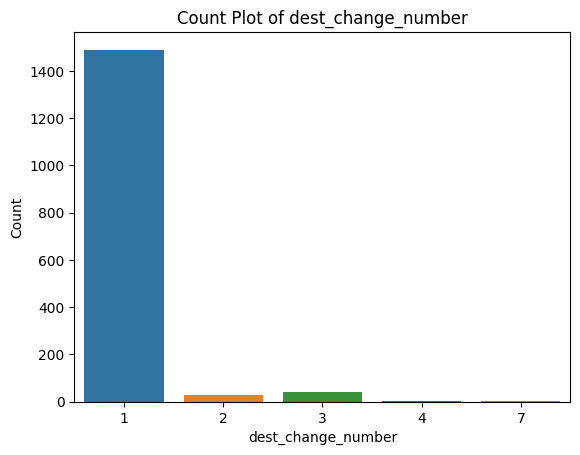

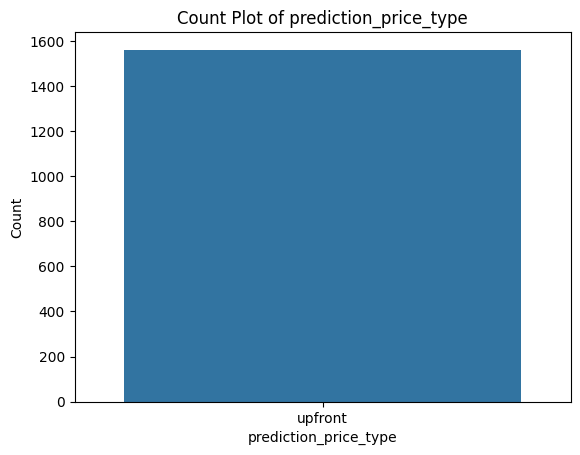

In [25]:
# Example usage
x_values = ['entered_by', 'order_state', 'gps_confidence','eu_indicator',
           'overpaid_ride_ticket','dest_change_number','prediction_price_type']  # Replace with your desired X values
y = 'order_id_new'  # Replace with your Y value

plotSum(df_significant_price_difference, x_values, y)



## Analyzing effect of different numerical variables on upfront price
## for significance data (% of price difference is > 20%)

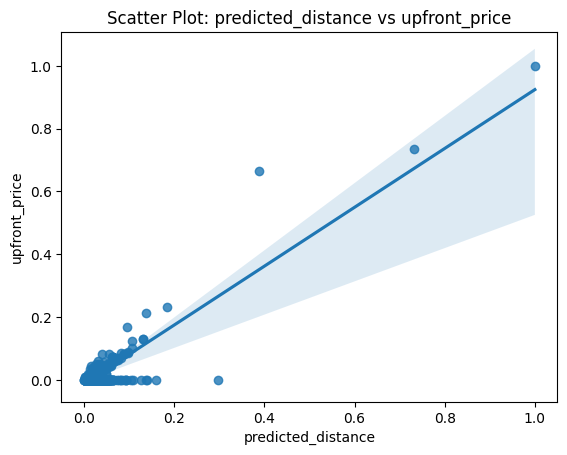

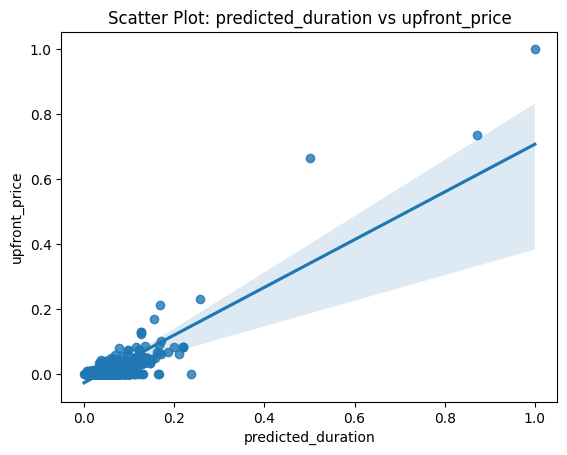

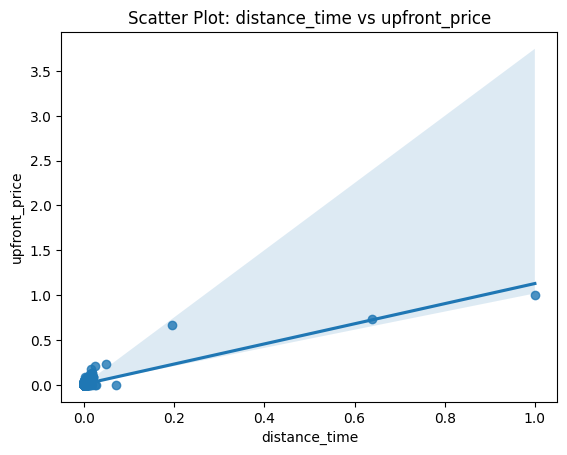

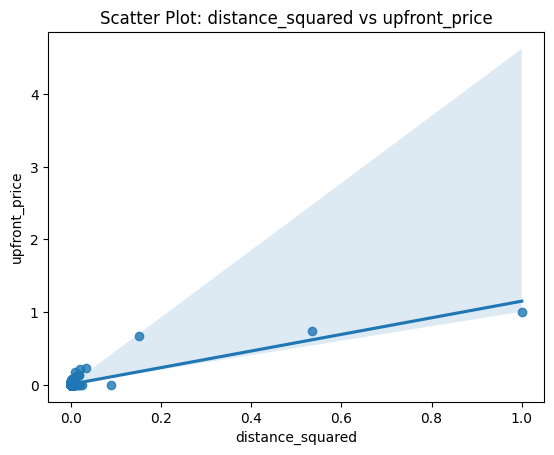

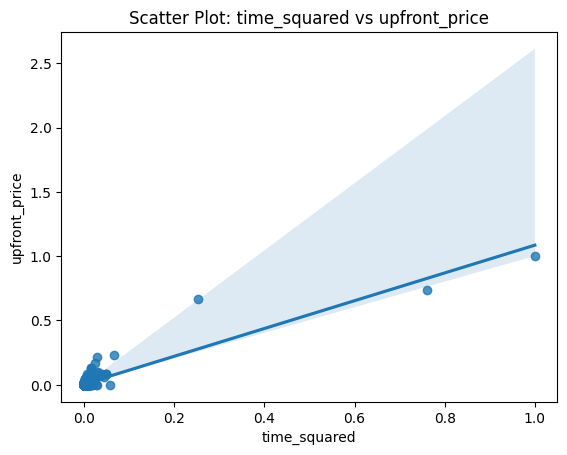

In [26]:
y = 'upfront_price'
X = ['predicted_distance', 'predicted_duration',
     'distance_time',
     'distance_squared','time_squared']

plot_relationships(df_significant_price_difference, y, X)


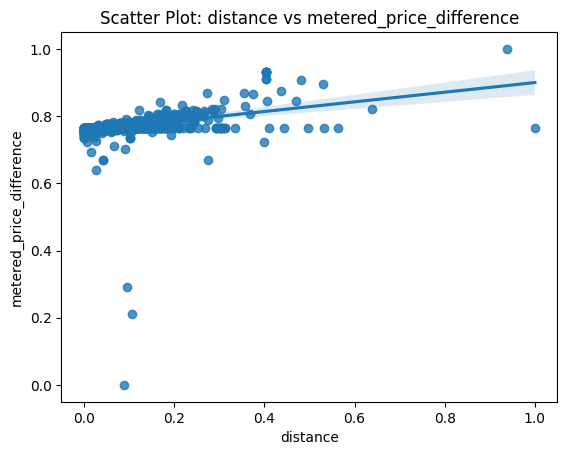

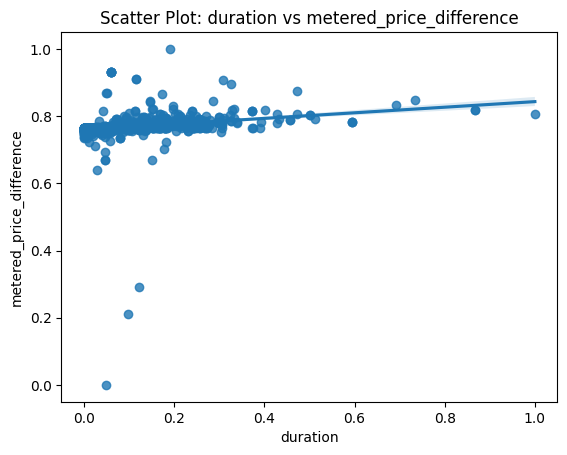

In [27]:
## on shorter distance and duration the price difference is pretty low but when it is increased, the price differnce 
## increase
y = 'metered_price_difference'
X = ['distance',
     'duration']

plot_relationships(df_significant_price_difference, y, X)


## Analyzing outliers dataset to see what is impacting the metered price differnce percentage

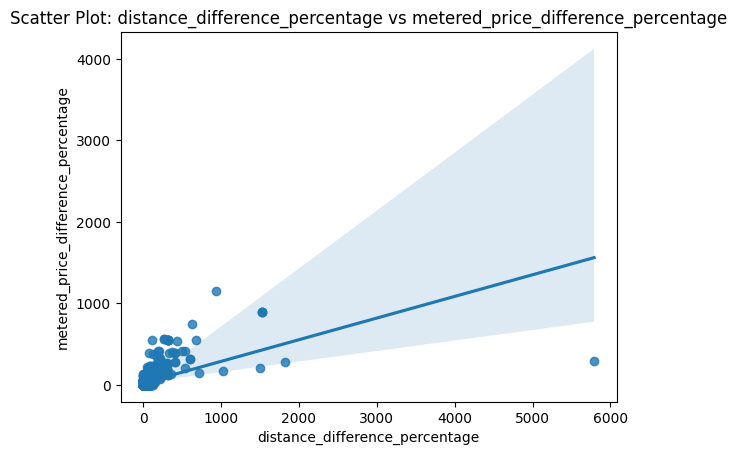

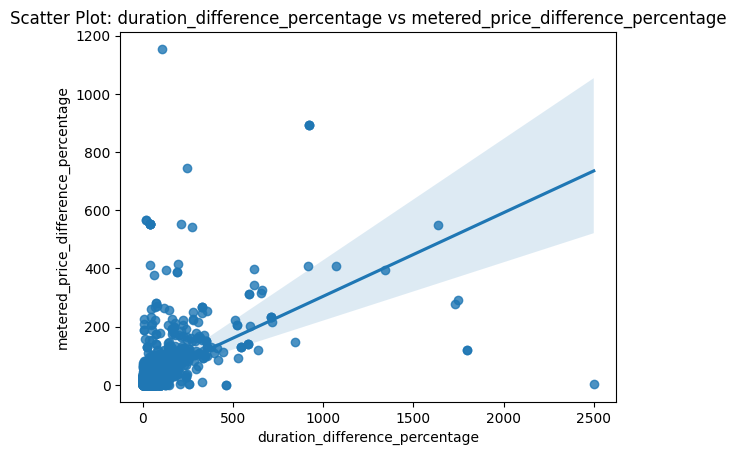

In [28]:
df_selected = df_outliers[['metered_price', 'upfront_price','distance_difference_percentage',
                           'duration_difference_percentage',
                           'metered_price_difference_percentage']]
df_sorted = df_selected.sort_values(by=['metered_price_difference_percentage'], ascending=False)


cols = ['metered_price', 'upfront_price','distance_difference_percentage',
                           'duration_difference_percentage',
                           'metered_price_difference_percentage']
df_sorted = columnNormalization(df_sorted, cols)
df_sorted.head()



y = 'metered_price_difference_percentage'
X = ['distance_difference_percentage',
     'duration_difference_percentage']

plot_relationships(df_nan_removed, y, X)


# Statistical testing between variables to understand the impact

## Below is a correlation test to check effect of analyze the correlation of different numerical variables on upfront price

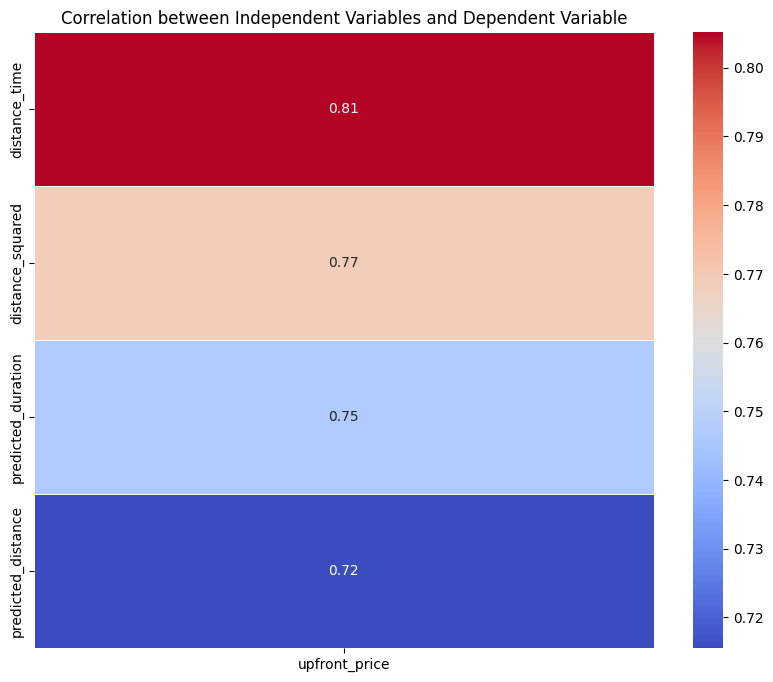

,upfront_price
distance_time,0.805167
distance_squared,0.768433
predicted_duration,0.746837
predicted_distance,0.715542


In [29]:
dependent_var = 'upfront_price'
independent_vars = ['predicted_distance','predicted_duration', 
                    'distance_time', 'distance_squared']

plot_variable_correlation(df_nan_removed, dependent_var, independent_vars)


## Regression analysis of different variables on upfront price to understand how each variable is contributing to the variability of upfront price

In [30]:

# Assuming X is a DataFrame with independent variables
X = df_nan_removed[['predicted_duration', 'predicted_distance','distance_time', 'time_distance', 'distance_squared', 'gps_confidence', 'eu_indicator', 'dest_change_number']]

# Assuming y is the dependent variable
y = df_nan_removed['upfront_price']
# Perform regression analysis
results = regressionAnalysis(X, y)

# Print the results
results

,Variable,R-squared,P-value
0,All Combined,0.843141,5.710689e-57
1,distance_time,0.648295,0.000000e+00
2,distance_squared,0.590489,0.000000e+00
3,predicted_duration,0.557765,0.000000e+00
4,predicted_distance,0.512000,0.000000e+00
5,eu_indicator_1,0.170775,9.482035e-141
6,gps_confidence_1,0.042844,2.637585e-34
7,dest_change_number_2,0.023298,3.210145e-19
8,time_distance,0.000669,1.310676e-01
9,dest_change_number_5,0.000052,6.725229e-01


## Performing Anova test to analyze how predicted_distance and predicted_duration 

In [31]:
## for predicted distance
performAnova(df, 'predicted_distance', ['eu_indicator', 'gps_confidence','DayOfTheWeek',
                                       'dest_change_number'])



,sum_sq,df,F,PR(>F)
DayOfTheWeek,1.652003e+09,6.0,2.531847,1.894706e-02
eu_indicator,2.328195e+09,1.0,21.409035,3.805606e-06
gps_confidence,1.951882e+09,1.0,17.948629,2.311026e-05
dest_change_number,3.992207e+09,1.0,36.710540,1.472548e-09
Residual,5.342801e+11,4913.0,NaN,NaN


In [32]:
# for predicted duration

performAnova(df, 'predicted_duration', ['predicted_distance','eu_indicator', 'gps_confidence','DayOfTheWeek'])



,sum_sq,df,F,PR(>F)
DayOfTheWeek,1.490584e+07,6.0,21.674099,2.784357e-25
predicted_distance,2.209337e+09,1.0,19275.147397,0.000000e+00
eu_indicator,1.566581e+08,1.0,1366.748826,3.429144e-264
gps_confidence,7.501443e+06,1.0,65.445632,7.463405e-16
Residual,5.631329e+08,4913.0,NaN,NaN
